# Steps to build a Neural Network using Keras

<ol>1. Loading the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Defining the architecture of the model</ol>
<ol>4. Compiling the model (defining loss function, optimizer)</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance on training and validation set</ol>

## 1. Loading the dataset

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading the pre-processed dataset
data = pd.read_csv('loan_prediction_data.csv')

In [3]:
# looking at the first five rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [4]:
# checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
# checking the data type
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [6]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [7]:
# looking at the shape of the data
data.shape

(614, 12)

In [8]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [9]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

## 2. Creating training and validation set

In [10]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [11]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

## 3. Defining the architecture of the model

In [12]:
# importing the sequential model
from keras.models import Sequential

In [13]:
# importing different layers from keras
from keras.layers import InputLayer, Dense 

In [14]:
# number of input neurons
X_train.shape

(491, 11)

In [15]:
# number of features in the data
X_train.shape[1]

11

In [16]:
# defining input neurons
input_neurons = X_train.shape[1]

In [17]:
# number of output neurons

# since loan prediction is a binary classification problem, we will have single neuron in the output layer 

In [18]:
# define number of output neurons
output_neurons = 1

In [19]:
# number of hidden layers and hidden neurons

# It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own

In [20]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [21]:
# activation function of different layers

# for now I have picked relu as an activation function for hidden layers, you can change it as well
# since it is a binary classification problem, I have used sigmoid activation function in the final layer

In [22]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,))) #input_layer
model.add(Dense(units=neuron_hidden_layer_1, activation='relu')) #hidden_layer_1
model.add(Dense(units=neuron_hidden_layer_2, activation='relu')) #hidden_layer_2
model.add(Dense(units=output_neurons, activation='sigmoid')) #output_layer

In [23]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [24]:
# number of parameters between input and first hidden layer

input_neurons*neuron_hidden_layer_1

110

In [25]:
# number of parameters between input and first hidden layer

# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1 + 10

120

In [26]:
# number of parameters between first and second hidden layer

neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

55

In [27]:
# number of parameters between second hidden and output layer

neuron_hidden_layer_2*output_neurons + 1

6

## 4. Compiling the model (defining loss function, optimizer)

In [28]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy', 'Precision', 'Recall'])

## 5. Training the model

In [29]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 0s 27ms/step - loss: 0.6342 - accuracy: 0.6884 - precision: 0.6885 - recall: 0.9970 - val_loss: 0.6123 - val_accuracy: 0.6829 - val_precision: 0.6917 - val_recall: 0.9765
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6230 - accuracy: 0.6884 - precision: 0.6878 - recall: 1.0000 - val_loss: 0.6028 - val_accuracy: 0.6911 - val_precision: 0.6911 - val_recall: 1.0000
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.6864 - precision: 0.6864 - recall: 1.0000 - val_loss: 0.5956 - val_accuracy: 0.6911 - val_precision: 0.6911 - val_recall: 1.0000
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6052 - accuracy: 0.6864 - precision: 0.6864 - recall: 1.0000 - val_loss: 0.5894 - val_accuracy: 0.6911 - val_precision: 0.6911 - val_recall: 1.0000
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.6884 - precision: 

Epoch 38/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.8106 - precision: 0.7919 - recall: 0.9822 - val_loss: 0.4788 - val_accuracy: 0.8130 - val_precision: 0.7925 - val_recall: 0.9882
Epoch 39/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.8106 - precision: 0.7919 - recall: 0.9822 - val_loss: 0.4780 - val_accuracy: 0.8130 - val_precision: 0.7925 - val_recall: 0.9882
Epoch 40/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4710 - accuracy: 0.8106 - precision: 0.7919 - recall: 0.9822 - val_loss: 0.4778 - val_accuracy: 0.8130 - val_precision: 0.7925 - val_recall: 0.9882
Epoch 41/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.8106 - precision: 0.7919 - recall: 0.9822 - val_loss: 0.4768 - val_accuracy: 0.8130 - val_precision: 0.7925 - val_recall: 0.9882
Epoch 42/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.8106 - precisi

## 6. Evaluating model performance on validation set

In [30]:
# getting predictions for the validation set
prediction = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [31]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction)

0.8130081300813008

### Visualizing the model performance

In [32]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

In [33]:
sns.set_style("darkgrid")

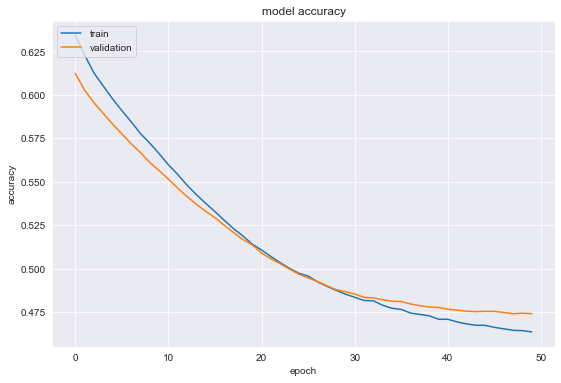

In [34]:
# summarize history for accuracy
plt.figure(figsize=(9,6))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [35]:
metrics = list(model_history.history.keys())
metrics.remove("loss")
metrics.remove("val_loss")

In [36]:
metrics

['accuracy',
 'precision',
 'recall',
 'val_accuracy',
 'val_precision',
 'val_recall']

In [37]:
def plotMetric(metric):
    plt.figure(figsize=(9,6))
    plt.plot(model_history.history[metric])
    val_metric = "val_"+str(metric)
    plt.plot(model_history.history[val_metric])
    plt.title('model ' + str(metric))
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc="best")
    plt.show()

In [ ]:
def plotMetric(metric):
    plt.figure(figsize=(10,8)
    plt.plot(model_history.history[metric])

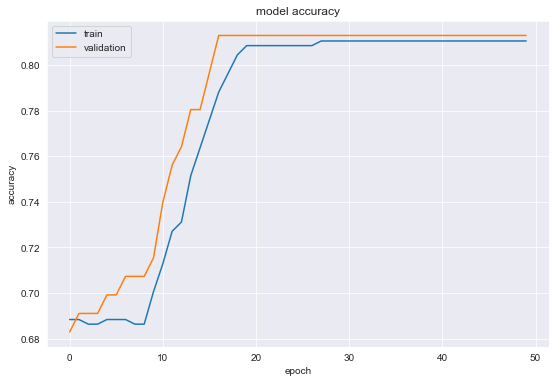

In [38]:
plotMetric("accuracy")

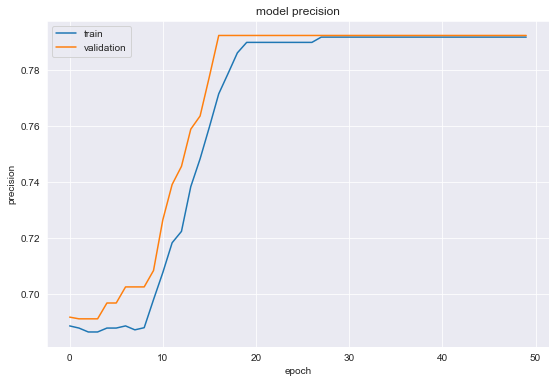

In [39]:
plotMetric("precision")

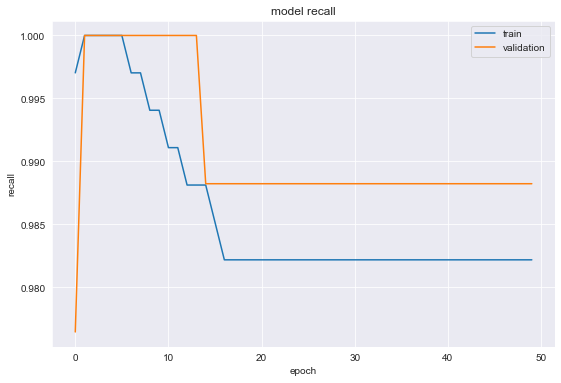

In [40]:
plotMetric("recall")